# ***Reparameterization of the categorical distribution***





We will work with Torch throughout this notebook.

In [25]:
import torch
from torch.distributions import Beta, Categorical, Gumbel
from torch.nn import functional as F

In [26]:
torch.manual_seed(0)

A helper function to visualize the generated samples:

In [27]:
import matplotlib.pyplot as plt
def compare_samples (samples_1, samples_2, bins=10, range=None):
  fig = plt.figure()
  if range is not None:
    plt.hist(samples_1, bins=bins, range=range)
    plt.hist(samples_2, bins=bins, range=range)
  else:
    plt.hist(samples_1, bins=bins)
    plt.hist(samples_2, bins=bins)
  plt.xlabel('value')
  plt.ylabel('number of samples')
  plt.legend(['direct','via reparameterization'])
  plt.show()

### ***Categorical Distribution***
Below write a function that generates N samples from Categorical (**a**), where **a** = $[a_0, a_1, a_2, a_3]$.

In [28]:
def categorical_sampler(a, N):
  # Generate N samples from categorical distribution with probs a

  dist = Categorical(probs=a)
  samples = dist.sample((N,))
  
  return samples  # should be size N

Now write a function that generates samples from Categorical (**a**) via reparameterization:




In [29]:
# Hint: approximate the Categorical distribution with the Gumbel-Softmax distribution
def categorical_reparametrize(a, N, temp=0.1, eps=1e-20):  # temp and eps are hyperparameters for Gumbel-Softmax

  dist = Gumbel(0,1)
  u = dist.sample((N, a.shape[0]))
  samples = F.softmax((torch.log(a + eps) + u) / temp, dim=1)
  
  return samples # make sure that your implementation allows the gradient to backpropagate


Generate samples when $a = [0.1,0.2,0.5,0.2]$ and visualize them:

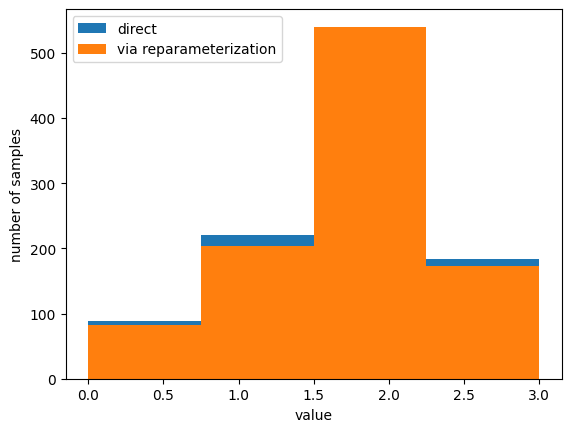

In [30]:
a = torch.tensor([0.1,0.2,0.5,0.2])
N = 1000
direct_samples = categorical_sampler(a, N)
reparametrized_samples = categorical_reparametrize(a, N, temp=0.1, eps=1e-20) # N x 4
# Convert reparametrized samples to hard samples
hard_samples = torch.argmax(reparametrized_samples, dim=1)
compare_samples(direct_samples, hard_samples, bins=4)